The teams that have the youngest coaches are by order 
 0         AFC Bournemouth
1              Watford FC
2       Leicester City FC
3     Newcastle United FC
4              Everton FC
5        Swansea City AFC
6    Tottenham Hotspur FC
7              Burnley FC
8      Manchester City FC
9    Huddersfield Town FC
Name: OfficialName, dtype: object


Text(0.5,1,'Distibyution of the ages of the coaches of Premier League')

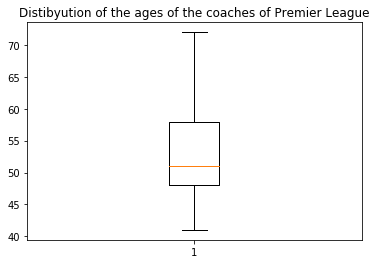

In [15]:
import pandas as pd
import datetime  
from dateutil.parser import parse
from collections import defaultdict
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------
#read my file
coaches = pd.read_json("coaches.json")
teams = pd.read_json("teams.json")
eng = pd.read_json("matches_England.json")
#-----------------------------------------------------------------------------------
#C_O_A_C_H__F_I_L_E
#********************************************************************************
#lose all the coaches that don't have their birth date in the file 
coaches = coaches[pd.notnull(coaches['birthDate'])]
#reset the indexes again from 0 to ... after removing some rows(nan)
coaches = coaches.reset_index()
#now i am ready to calculate the age 
#i compute now so i can find the exact age
now = pd.Timestamp("now")
#i tranfsorm my column into a datetime element that ecognise years months and days
coaches["birthDate"] = pd.to_datetime(coaches["birthDate"], format = "%Y-%m-%d")
#i create a new column "age", where i calculate the age. I use astype(<m8[y]) cause if i don't this format gives me 
#the total says this guy lived on earth.. So this makes it into years
coaches["age"] = (now - coaches["birthDate"]).astype('<m8[Y]')
coaches.age = coaches.age.astype(int)
#i drop the columns that i actually dont need
coaches.drop(columns = ["index", "birthDate", "birthArea", "passportArea", "currentTeamId","firstName", "lastName", "middleName"], inplace = True  )
#rename my columns to make it more readable
coaches.columns = ["Coach", "Name", "Age"]
coaches = coaches.set_index("Coach")
#-------------------------------------------------------------------------------------
#T_E_A_M__F_I_L_E
#***********************************************************************************
#drop the columns that i don't need
teams.drop(columns = ["city", "name", "area", "type"], inplace = True)
#rename my columns to make it more readable
teams.columns = ["TeamId", "OfficialName"]
#-----------------------------------------------------------------------------------
#T_E_A_M__C_O_A_C_H__F_I_L_E
#***************************************************************************************
#create a dictionary, which later will transform in a new dataframe
teamscoaches = {}
#iterate foa all the rows in our dataframe so i can access the dictionary that exists in the teamsData column
for i in range(1, len(eng)):
    team = pd.DataFrame.from_dict(eng.teamsData[i]).T
    teamscoaches[team.coachId[0]] = (int(team.teamId[0]))
    teamscoaches[team.coachId[1]] = (int(team.teamId[1]))
#make a dataframe out of it 
teamscoaches = pd.Series(teamscoaches).to_frame()
#reset the index to make the iterations easier
teamscoaches = teamscoaches.reset_index()
#change the columns for readability
teamscoaches.columns = ["Coach", "TeamId"]
#Lose the null values 
teamscoaches = teamscoaches[teamscoaches.Coach != 0]
#now i'll make a new dictionary where i'll keep all my coaches of one team in a list so 
#i can make the comparison between them 
youngercoach = defaultdict(list)
for i in range(1, len(eng)):
    team = pd.DataFrame.from_dict(eng.teamsData[i]).T
    if team.coachId[0] not in youngercoach[team.teamId[0]]:
        youngercoach[team.teamId[0]].append(int(team.coachId[0]))
    if team.coachId[1] not in youngercoach[team.teamId[1]]:
        youngercoach[team.teamId[1]].append(int(team.coachId[1]))
youngercoach = pd.Series(youngercoach).to_frame()
youngercoach = youngercoach.reset_index()
youngercoach.columns = ["TeamId", "CoachId"]
#until here is almost the same steps as the teamscoaches without having a list to compare the coaches age 
#now we will compare the ages of the multiple coaches of one team adn keep the younger
co = []
for ele in youngercoach.CoachId:
    m=99
    for a in ele:
        if a == 0 :
            continue
        else:
            #handlind the keyerror cause there are coacheIds that dont exist in the coach dataframe
            try:
                if coaches.loc[a].Age <m :
                    m = coaches.loc[a].Age
                    o = a
            except KeyError:
                pass
    co.append(o)
youngercoach["Coach"] = co
youngercoach.drop(columns=["CoachId"], inplace = True) 
coaches = coaches.reset_index()
step = pd.merge(coaches, youngercoach, on = "Coach")
topyounge = pd.merge(step, teams, on = "TeamId")
topyounge = topyounge.sort_values(by = "Age")
topyounge.sort_values(by = "Age", inplace = True)
topyounge = topyounge.reset_index()
topyounge.drop(columns = "index", inplace = True)
#------------------------------------------------------------------------
#P_R_E_M_I_E_R__L_E_A_G_U_E
#here are all the coaches, ages of coaches and teams
#concatinating the frames with 2 steps 
step_1 = pd.merge(coaches, teamscoaches)
#step2
premier_league = pd.merge(step_1, teams)
#------------------------------------------------------------------------
#F_I_R_S_T__Q_U_E_S_T_I_O_N
print("The teams that have the youngest coaches are by order \n", topyounge.head(10).OfficialName)
#S_E_C_O_N_D__Q_U_E_S_T_I_O_N
a = plt.boxplot(premier_league.Age)
plt.title("Distibyution of the ages of the coaches of Premier League")


In [ ]:
    `